In [446]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as sc

#plt.rcParams["text.usetex"] = True

# TDVP

In [18]:
B   = 1/1000000              # Magnetfeld
g1  = 100              # Kopplung zum B-Feld
g2  = 1
a   = 1   


def N(m1,m2,m12):
    return 1+ m1*np.conj(m1)+ m2*np.conj(m2)+ m1*m2*np.conj(m1*m2) + m1*m2*np.conj(m12)+ np.conj(m1*m2)*m12 + m12*np.conj(m12)


# Gram-Matrix
def InvGramMat(m1,m2,m12):
    G = np.zeros((3,3), dtype=complex)
    G[0,0] = (1+m1*np.conj(m1))**2 + m12*np.conj(m12)
    G[1,1] = (1+m2*np.conj(m2))**2 + m12*np.conj(m12)
    G[2,2] = 1+m1*np.conj(m1) + m2*np.conj(m2)
    
    G[0,1] = -(m1**2)*np.conj(m12) - (np.conj(m2)**2)*m12
    G[0,2] = m2*(1+m2*np.conj(m2)) - np.conj(m1)*m12
    G[1,2] = m1*(1+m1*np.conj(m1)) - np.conj(m2)*m12
    
    G[1,0] = np.conj(G[0,1])
    G[2,0] = np.conj(G[0,2])
    G[2,1] = np.conj(G[1,2])
    G = G/N(m1,m2,m12)
    G_ = np.linalg.inv(G)
    return G_

def dH(m1,m2,m12):
    # Ableitung nach m1
    H1_m1 = - g1*B*m1*((1+m2*np.conj(m2))**2) + m12*np.conj(m2)*(1+m2*np.conj(m2))
    H2_m1 = - g2*B*m1*(1-m2*np.conj(m2))*(m2*np.conj(m2) + (m1*m2 + m12)*np.conj(m1*m2 + m12)) + m12*np.conj(m1)*(1+m2*np.conj(m2))
    H3_m1 = 0.5*a*(m2-m1)*(1+m2*np.conj(m2))*(1+m1*np.conj(m2)) + np.conj(2)*m12*np.conj(m1+m2) + np.conj(m12)*(m1*m2+m12)
    H_m1 = H1_m1 + H2_m1 + H3_m1
    
    # Ableitung nach m2
    H2_m2 = - g2*B*m2*((1+m1*np.conj(m1))**2) + m12*np.conj(m1)*(1+m1*np.conj(m1))
    H1_m2 = - g1*B*m2*(1-m1*np.conj(m1))*(m1*np.conj(m1) + (m1*m2 + m12)*np.conj(m1*m2 + m12)) + m12*np.conj(m1)*(1+m2*np.conj(m2))
    H3_m2 = 0.5*a*(m2-m1)*(1+m2*np.conj(m2))*(1+m1*np.conj(m2)) + np.conj(2)*m12*np.conj(m1+m2) + np.conj(m12)*(m1*m2+m12)
    H_m2 = H3_m2 +H2_m2 + H3_m2
    
                    
    # Ableitung nach m12
    H1_m12 = g1*B*(m1*m2 + m12)*(1 + m2*np.conj(m2))
    H2_m12 = g2*B*(m1*m2 + m12)*(1 + m1*np.conj(m1))
    H3_m12 = 0.5*a*(m2-m1)*np.conj(m2-m1)*(m1*m2+m12)
    H_m12 = H3_m12 +H2_m12 + H3_m12                
                    
    dH = np.array([H_m1,H_m2,H_m12])/(N(m1,m2,m12)**2)
    return dH

                 
def dm(t,m):
    m1 = m[0]
    m2 = m[1]
    m12 = m[2]
    InvGram = InvGramMat(m1,m2,m12)
    H = dH(m1,m2,m12)
    dm1 = -1j * (H[0]*InvGram[0,0] + H[1]*InvGram[0,1] +  H[2]*InvGram[0,2])
    dm2 = -1j * (H[0]*InvGram[1,0] + H[1]*InvGram[1,1] +  H[2]*InvGram[1,2])
    dm3 = -1j * (H[0]*InvGram[2,0] + H[1]*InvGram[2,1] +  H[2]*InvGram[2,2])                 
    dm = np.array([dm1,dm2,dm3])
    return dm


# Spin

$$ S_x = \frac{1}{2}\frac{\overline{\mu_1}+\mu_1 + \overline{\mu_2}(\mu_1\mu_2 + \mu_{12}) + \mu_2(\overline{\mu_1\mu_2 + \mu_{12}})}{1 + \mu_1\overline{\mu_1} + \mu_2\overline{\mu_2} + (\mu_1\mu_2 + \mu_{12})\overline{(\mu_1\mu_2 + \mu_{12})}}$$
$$S_y = \frac{i}{2}\frac{\overline{\mu_1}-\mu_1 + \overline{\mu_2}(\mu_1\mu_2 + \mu_{12}) + \mu_2(\overline{\mu_1\mu_2 + \mu_{12}})}{1 + \mu_1\overline{\mu_1} + \mu_2\overline{\mu_2} + (\mu_1\mu_2 + \mu_{12})\overline{(\mu_1\mu_2 + \mu_{12})}}$$

In [37]:
def S(t,m):
    m1 = m[0]
    m2 = m[1]
    m12= m[2]
    Sx = (0.5 * (m1 + np.conj(m1) + np.conj(m2)*(m1*m2 + m12) + m2*np.conj(m1*m2 + m12)))/N(m1,m2,m12)
    Sy = (0.5j * (m1 - np.conj(m1) - np.conj(m2)*(m1*m2 + m12) + m2*np.conj(m1*m2 + m12)))/N(m1,m2,m12)
    Sz = (0.5 * (1 - m1*np.conj(m1) - m2*np.conj(m2) - (m1*m2 + m12)*np.conj(m1*m2 + m12)))/N(m1,m2,m12)
    return np.array([Sx,Sy,Sz])
          
def I(t,m):
    m_ = np.array([m[1],m[0],m[2]])
    return S(t,m_)

# Runge-Kutta

geht nicht


c:\Users\salem\anaconda3\lib\site-packages\scipy\integrate\_ode.py:1013: UserWarning: zvode: Excess work done on this call. (Perhaps wrong MF.)
  warnings.warn('{:s}: {:s}'.format(self.__class__.__name__,
c:\Users\salem\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


1.5857470255252137

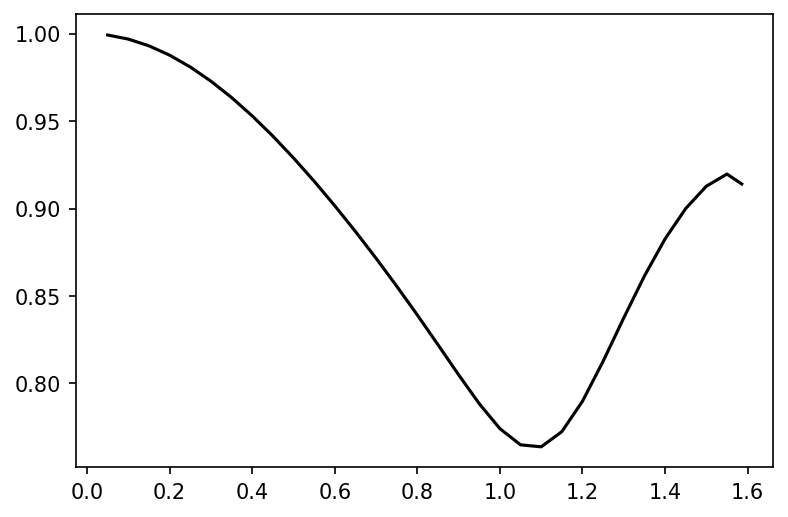

In [40]:
m0 = np.array([1,-1,0])
M = sc.ode(dm).set_integrator('zvode') #, method='bdf'
M.set_initial_value(m0, 0)
t1 = 100
dt = 0.05
plt.figure(dpi=150)
t = []
f = []
while M.successful() and M.t < t1:
    M.integrate(M.t+dt)
    #print( "t: ",M.t,"y: ", M.y)
    f.append(M.y)
    t.append(M.t)
    if not M.successful():
        print("geht nicht")
t = np.array(t)
m = np.array(f)
plt.plot(t, m[:,0],"k-")
t[-1]

In [41]:
plt.figure(dpi=150)
Sx = S(t,m.T).T
Ix = I(t,m.T).T
t_=t
plt.plot(t_,Sx[:,0],"r-",label="S_x")
#plt.plot(t,Ix[:,0],"b-")


TypeError: 'numpy.ndarray' object is not callable

<Figure size 900x600 with 0 Axes>

# Exakte Lösung

c:\Users\salem\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 1.0, '$<S_x>$')

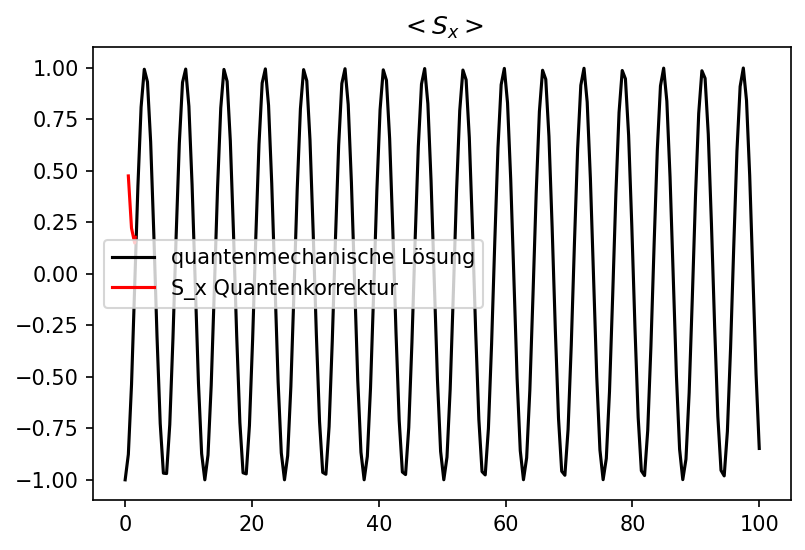

In [43]:
# Parameter
B   = 1/1000000              # Magnetfeld
g1  = 100              # Kopplung zum B-Feld
g2  = 1
a   = 1              # Heisenberg-Kopplung

E_1 = B*(g1+g2) + a/4
E_2 = -B*(g1+g2) + a/4
E_3 = -a/4 + np.sqrt(a**2 + (B*(g1-g2))**2)/2
E_4 = -a/4 - np.sqrt(a**2 + (B*(g1-g2))**2)/2

E = np.diag([E_1,E_2,E_2,E_4])

E_13 = E_1-E_3
E_14 = E_1-E_4
E_23 = E_2-E_3
E_24 = E_2-E_4

e1 = (a + np.sqrt( (B*(g1-g2))**2 + a**2  ))/(B*(g1-g2))
e2 = (a - np.sqrt( (B*(g1-g2))**2 + a**2  ))/(B*(g1-g2))
N1 = np.sqrt(e1**2 + 1)
N2 = np.sqrt(e2**2 + 1)

plt.figure(dpi=150)
t = np.linspace(0,100,200)

def S_x(t):
    S1 = ((e1-1)/N1)*( (-np.sqrt(2)/N1)*np.cos(E_13*t) + 0.5*np.cos(-E_13*t))
    S2 = ((e2-1)/N2)*( (-np.sqrt(2)/N2)*np.cos(E_14*t) + 0.5*np.cos(-E_14*t))
    S3 = ((e1+1)/N1)*( (-np.sqrt(2)/N1)*np.cos(E_23*t) - 0.5*np.cos(-E_23*t))
    S4 = ((e2+1)/N2)*( (-np.sqrt(2)/N2)*np.cos(E_24*t) - 0.5*np.cos(-E_24*t))
    return S1 + S2 + S3 + S4

S = S_x(t)

plt.plot(t,S, "k-" ,label = "quantenmechanische Lösung")
plt.plot(t_,Sx[:,0],"r-",label="S_x Quantenkorrektur")
plt.legend()
plt.title(r"$<S_x>$")

<IPython.core.display.Javascript object>


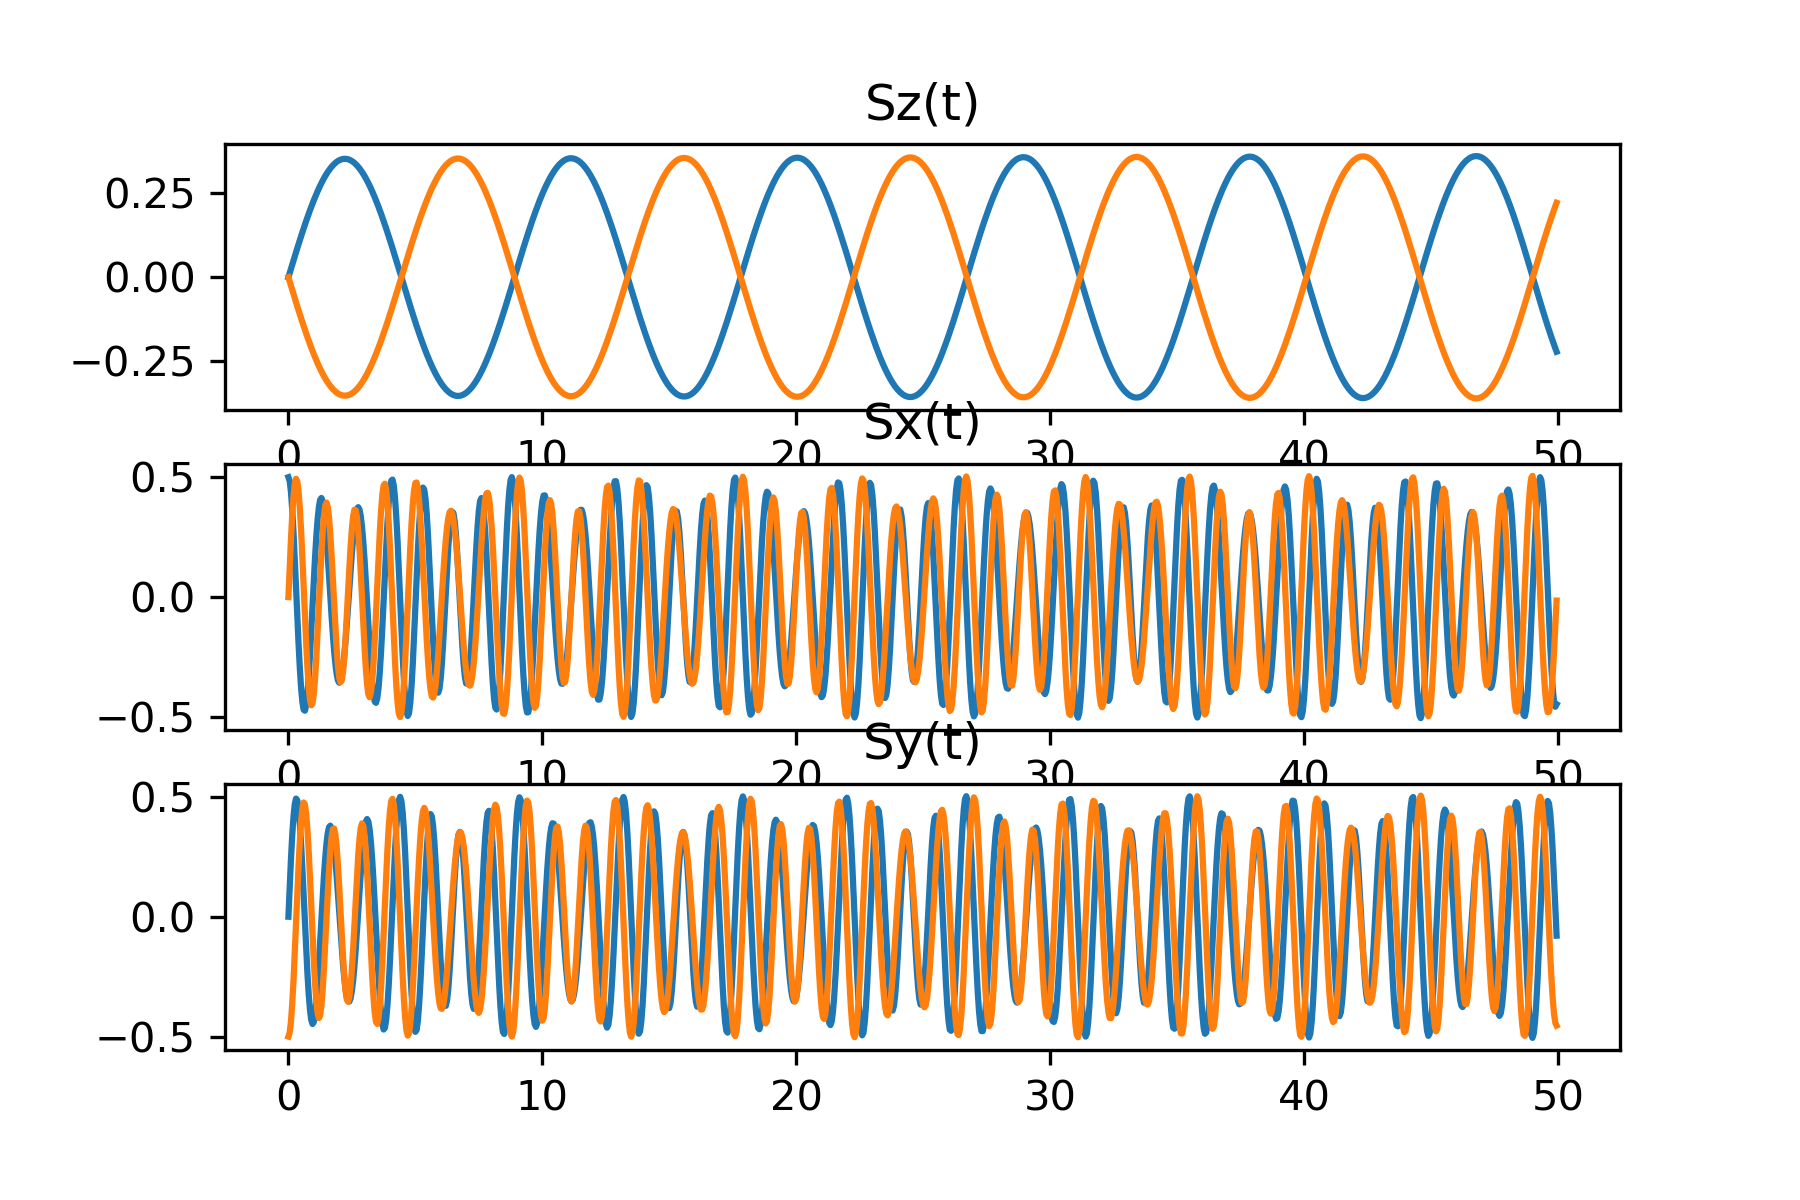

1000

In [726]:
B = 5
g1 = 1
g2 = 1
a = 1


def Klassischer_Spin(t,S):
    [S_x, S_y , S_z, I_x, I_y, I_z] = S

    dS_x = a*I_y*S_z - (g1*B + a*I_z)*S_y
    dS_y = (g1*B+a*I_z)*S_x - a*I_x*S_z
    dS_z = a*I_x*S_y - a*I_y*S_x

    dI_x = a*S_y*I_z - (g2*B+a*S_z)*I_y 
    dI_y = (g2*B+a*S_z)*I_x - a*S_x*I_z
    dI_z = a*S_x*I_y - a*S_y*I_x

    return np.array([dS_x, dS_y, dS_z, dI_x, dI_y, dI_z])

# DGL lösen:
Spin_0 = 0.5*np.array([1,0,0,0,-1,0])
t = np.arange(0,50,0.05)
sol = sc.solve_ivp(Klassischer_Spin, y0= Spin_0, t_span = [t[0],t[-1]], t_eval = t, method="RK45" )

fig, ax = plt.subplots(3,dpi=150)
ax[0].plot(sol.t,sol.y[2])
ax[0].plot(sol.t,sol.y[5])
ax[0].set_title("Sz(t)")
ax[1].plot(sol.t,sol.y[0])
ax[1].plot(sol.t,sol.y[3])
ax[1].set_title("Sx(t)")
ax[2].plot(sol.t,sol.y[1])
ax[2].plot(sol.t,sol.y[4])
ax[2].set_title("Sy(t)")

# plt.plot(sol.t,sol.y[3])
# plt.plot(sol.t,sol.y[4])

len(t)

<IPython.core.display.Javascript object>


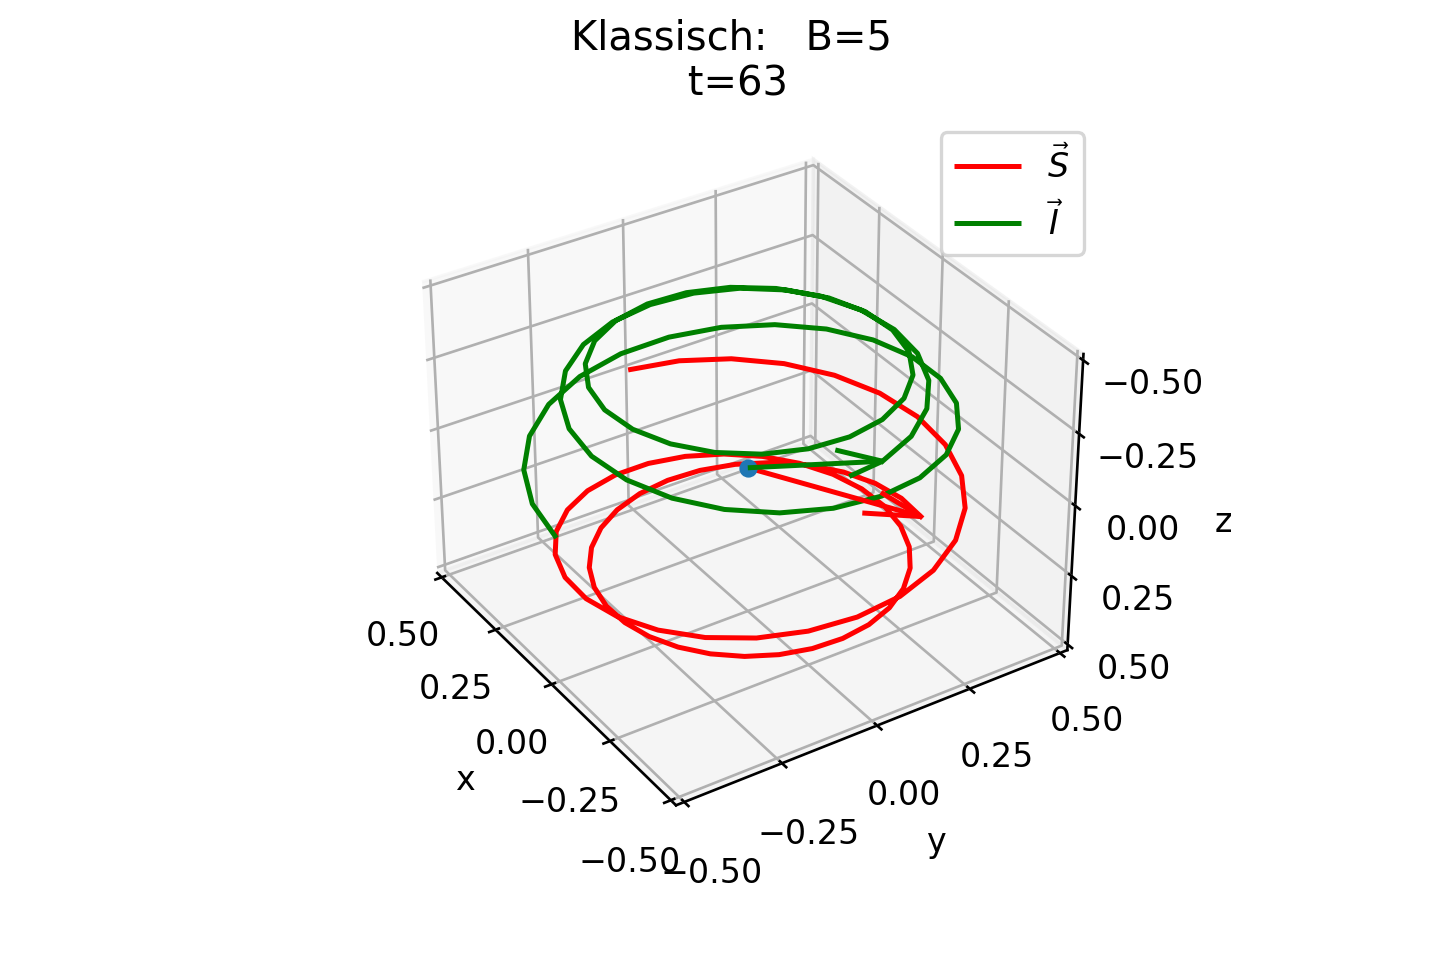

In [727]:

fig = plt.figure(dpi=120)
ax = fig.add_subplot(projection='3d')
#graph = ax.plot(sol.y[0][0],sol.y[1][0],sol.y[2][0])
quiver = ax.quiver
ax.grid()
yy, xx = np.meshgrid(np.arange(-1,1), np.arange(-1,1))
zz = yy*0



ticks = np.array([-0.5,-0.25,0,0.25,0.5])
def update_graph(i):
    i *=3
    ax.cla()
    ax.quiver(0,0,0,sol.y[0][i],sol.y[1][i],sol.y[2][i],color="r",label=r"$\vec{S}$")
    ax.quiver(0,0,0,sol.y[3][i],sol.y[4][i],sol.y[5][i],color="g",label=r"$\vec{I}$")
    ax.legend()
    ax.view_init(-147,33)
    ax.set_xlim([-0.5,0.5])
    ax.set_ylim([-0.5,0.5])
    ax.set_zlim([-0.5,0.5])
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_zticks(ticks)
    
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    
    ax.grid()
    ax.plot(sol.y[0][:i+1],sol.y[1][:i+1],sol.y[2][:i+1],"r-")
    ax.plot(sol.y[3][:i+1],sol.y[4][:i+1],sol.y[5][:i+1],"g-")
    ax.scatter(0,0,0,"kx")
    ax.set_title( 'Klassisch:   B={} \n t={} '.format(B,i))
    

ani = matplotlib.animation.FuncAnimation(fig, update_graph, 200, 
                               interval=100, blit=False)



<IPython.core.display.Javascript object>


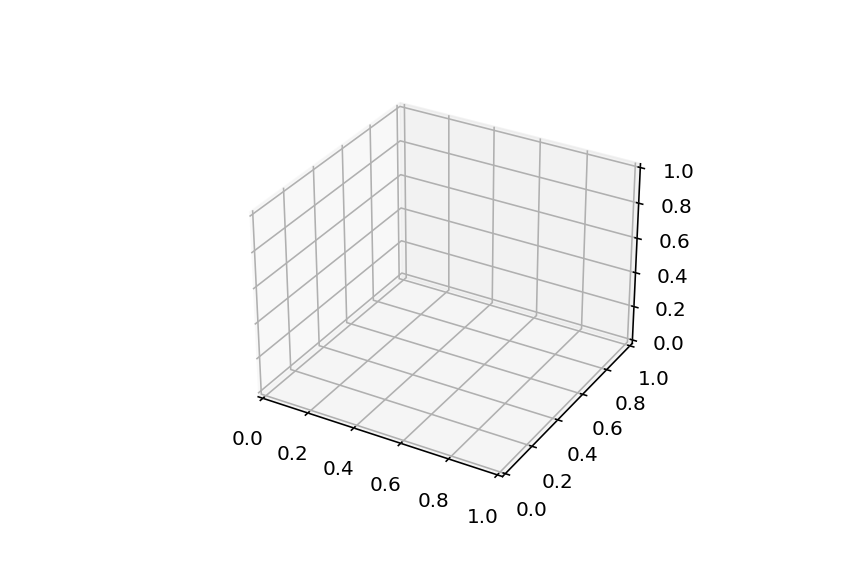

In [659]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

yy, xx = np.meshgrid(range(2), range(2))
zz = yy*0
fig = plt.figure()
ax2 = plt.subplot(projection='3d')
ax.plot_surface(xx, yy, zz,alpha=0.5)


<IPython.core.display.Javascript object>


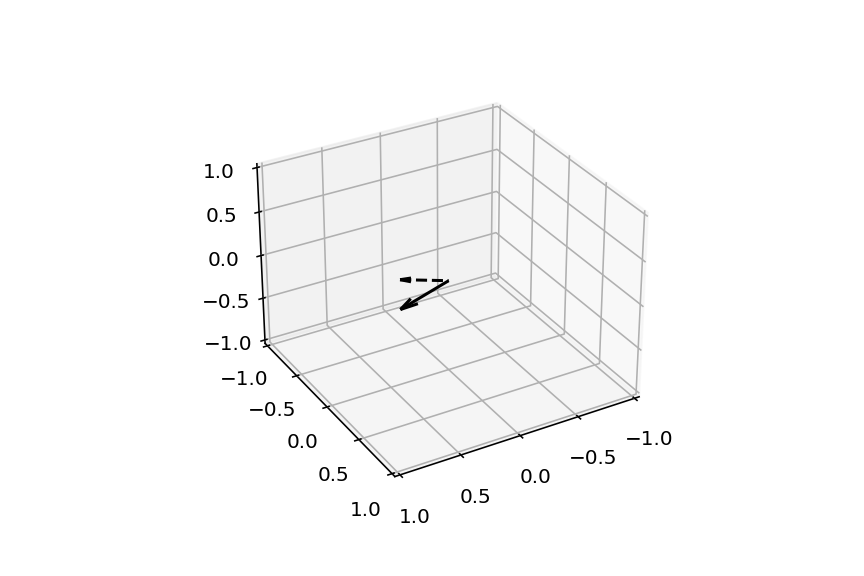

In [601]:
def data_gen(num):
    """Data generation"""
    num = num * 10   
    vx, vy, vz = sol.y[0][num], sol.y[1][num], sol.y[2][num]
    ax.cla()
    ax.quiver(0, 0, 0, vx, vy, vz, pivot="tail", color="black")
    ax.quiver(0, 0, 0, vx, vy, 0, pivot="tail", color="black",
              linestyle="dashed")
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_zlim(-1, 1)
    ax.view_init(elev=30, azim=60)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
data_gen(0)
ani = matplotlib.animation.FuncAnimation(fig, data_gen, 200, blit=False)
plt.show()

<IPython.core.display.Javascript object>


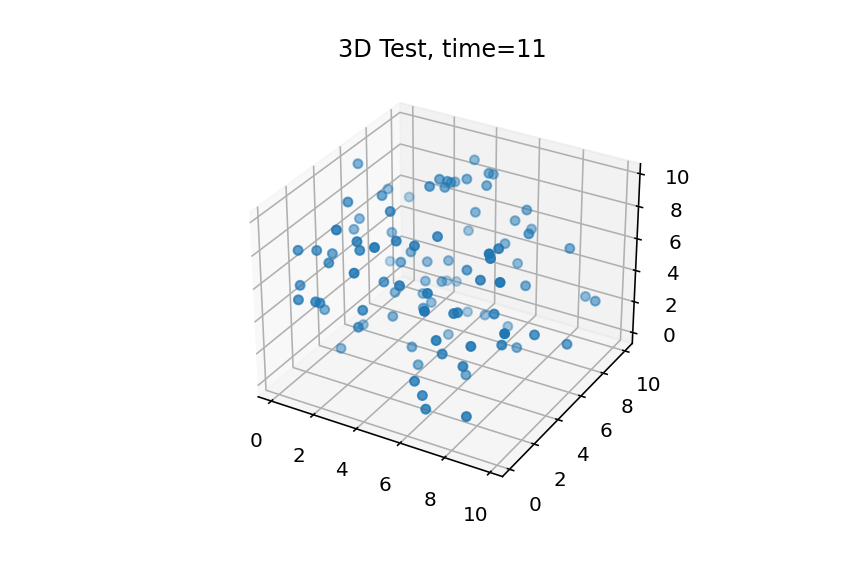